<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

### https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### data preparation and loading

In [2]:
# using linear regression 
# parameters

weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### train test split 80:20

In [3]:
train_split = int(0.8 * len(X))
train_split

40

In [4]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizations

In [5]:
def plot_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b",s=8, label="training data")
  plt.scatter(test_data, test_labels, c="g",s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions data")
  plt.legend(prop={"size":14})

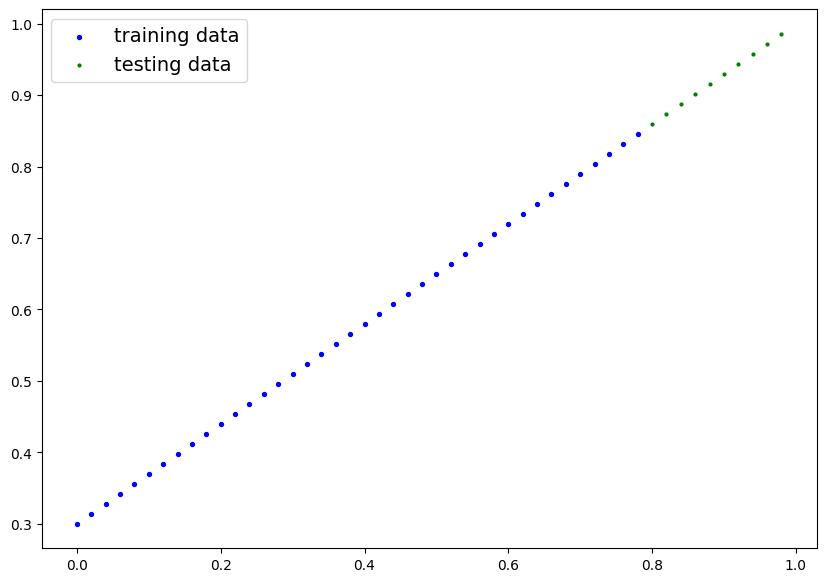

In [6]:
plot_visualizations()

### Build Model

In [7]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
    )

  #forward method for computation
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [9]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
#Making prediction using torch.inference_mode()

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

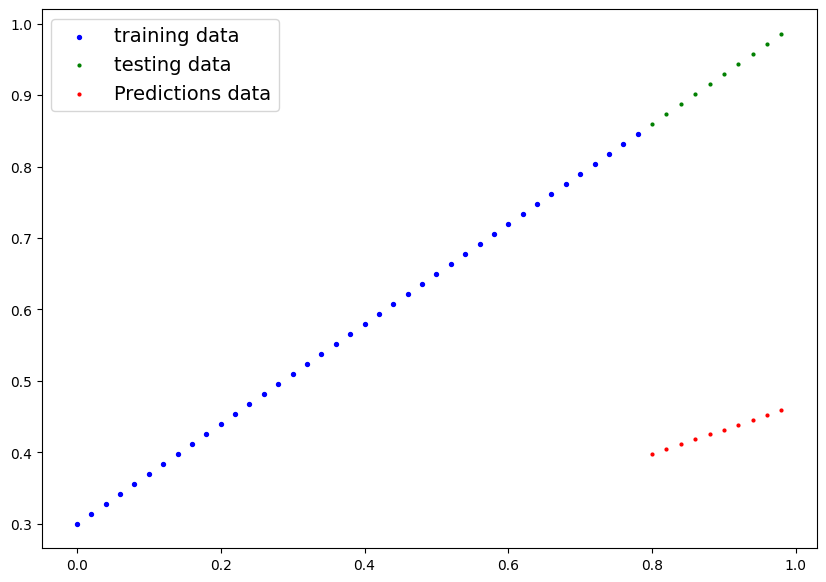

In [12]:
plot_visualizations(predictions=y_pred)

In [13]:
loss_fn = nn.L1Loss()

In [14]:
learning_rate = 0.01
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=learning_rate)

### training loop & testing loop

In [15]:
epochs = 250

epoch_count = []
loss_values = []
test_loss_values = []

for epochs in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  #print(loss)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  
  epoch_count.append(epochs)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  if epochs % 10 == 0:
    print(f"Epoch: {epochs} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [16]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

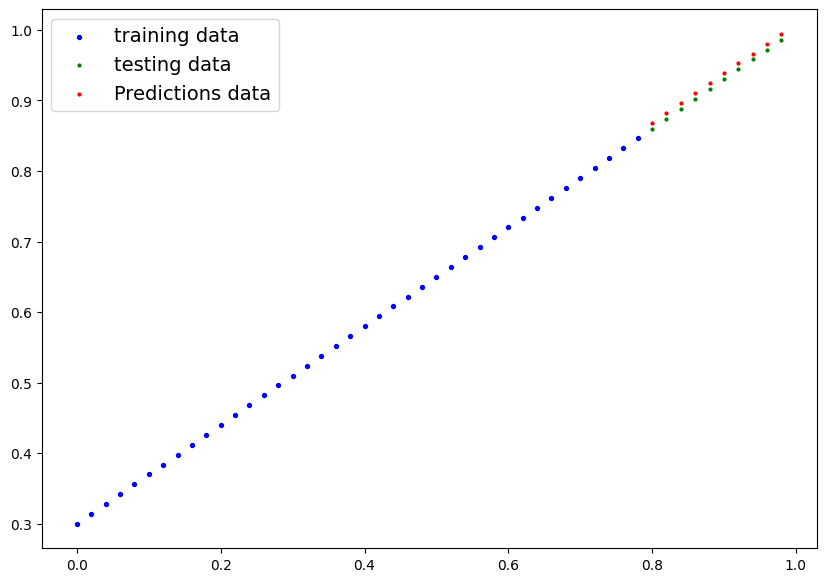

In [18]:
plot_visualizations(predictions=y_pred_new)

In [19]:
import numpy as np

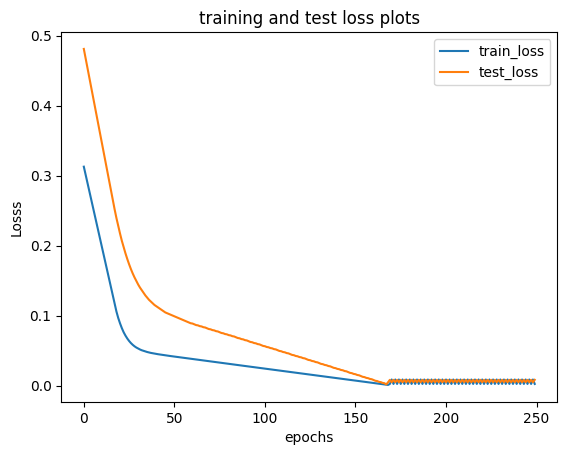

In [20]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="train_loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="test_loss")

plt.title("training and test loss plots")
plt.ylabel("Losss")
plt.xlabel("epochs")
plt.legend()

### Saving the model

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
#save PyTorch model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [24]:
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH
           )

In [26]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun 10 22:19 01_pytorch_workflow_model_0.pth
